# Assignment IHE HWR 2021-2023 transient groundwater flow

Prof. dr.ir. T.N.Olsthoorn
2021-12-22

Consider a region to the right of a straight river which is in direct contact with a water table aquifer that has a transmissivity of 900 m2/d or an average saturated thickness of 30 m and a horizontal conductivity of k=30 m/d. The specific yield of the aquifer is 10%.

There is a regional groundwater flow directed towards that river at a rate of q = 1 m2/d.

A groundwater pumping station with one well is installed at 1500 m distance from the river which starts extracting at time t=0 at a rate of 1200 m3/d. For the analysis the aquifer thickness can be considered constant as given above.

1.	Make a picture of the water table at a line through the pumping well perpendicular to the river at t the following times 0.001, 1day, 1 week, 1 month, 1 year, 10 years after the start of the extraction.
2.	Make a picture of the head contours in top view after 1 month, 1 year and 10 years.
3.	Make a picture of the flow direction in top view after 1 month, 1 year and 10years.
4.	Make a picture of the rate of inflow [m2/d] from the river after 1 month, 1 year and 10 years.
5.	At what 2 points at the river is the inflow after 1 year just zero?
6.	The river stage varies like a sine with an amplitude of 2 m and a cycle time of 1 year. How far from the river can this fluctuation be felt if one takes 10 cm amplitude as a criterion?
7.	Plot the envelopes on top of the steady state (or the head after years of constant pumping).
8.	How much is the delay of the stage wave in the river at the point where the amplitude is still only 10 cm?
9.	There is a sudden shower of rain equal to 240 mm, which raises the water table suddenly and uniformly.
10.	By how much will the water table rise due to this sudden recharge is it is assumed that all this precipitation will add to the groundwater?
11.	Show the development of the water table over time (for a few times after the shower took place) by adding its effect to the steady-state situation (pumping station has been pumping continuously for at least 10 years? 


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1, erfc

In [45]:
# Aquifer
k = 30 # m/d
D = 30 # m
kD = k * D # m2/d
Sy = 0.1 # Specific yield
L = 1500 # m, distance from well to river
Q = 1200 # m3/d, extraction from well
q = 1 # m2/d, unifrom groundwater dicharge from right to left
times = np.array([1e-3, 1, 7, 30, 365, 3650]) # times of interest

### 1.	Make a picture of the water table at a line through the pumping well perpendicular to the river at t the following times 0.001, 1day, 1 week, 1 month, 1 year, 10 years after the start of the extraction.

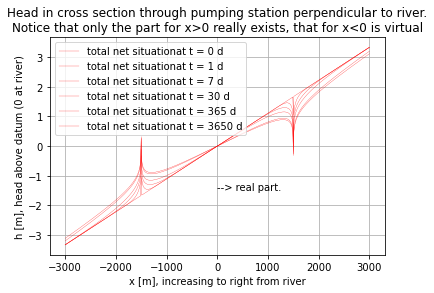

In [46]:
# The head at differnt times along the x-axis (from left to right thorugh pumping station, x=0 at river)

x = np.linspace(-3000, 3000, 601) # x coordinates
h = q / kD * x # not the sign

#plt.plot(x, h)
r0 = 0.25 # m well or borehole radius
r1 = x - L # Distance to well
r2 = x + L # Distance to mirror well
r1[np.abs(r1) <= r0] = r0
r2[np.abs(r2) <= r0] = r0

for t in times:
    u1 = r1 ** 2 * Sy / (4 * kD * t)
    u2 = r2 ** 2 * Sy / (4 * kD * t)

    # Compute drawdown
    s1 = -Q / (4 * np.pi * kD) * exp1(u1) # well
    s2 = +Q / (4 * np.pi * kD) * exp1(u2) # mirror well
    
    # Compute head
    h0 = h + s1 + s2 # Total head
    h1 = h + s1 # Head with only the well
    h2 = h + s2 # Hea with only the mirror well
    
    # the head due to well and mirror well separtely
    #plt.plot(x, h1, 'b', label='h1, real well')
    #plt.plot(x, h2, 'm', label='h2, mirror well')
    
    # Total net situation
    plt.plot(x, h0, 'r', lw=0.25, label='total net situationat t = {:.0f} d'.format(t))
    
    # Plot the drawdown due to well and mirror well, not absolute head
    #plt.plot(x, s1) # Drawdown due to only the well
    #plt.plot(x, s2) # Drawdown due to only the mirror well
    
# Decorate the plot
plt.title("Head in cross section through pumping station perpendicular to river.\n" +
         "Notice that only the part for x>0 really exists, that for x<0 is virtual")
plt.xlabel("x [m], increasing to right from river")
plt.ylabel("h [m], head above datum (0 at river)")
plt.text(0, -1.5, '--> real part.' )
plt.grid(True)
plt.legend()
plt.show() # Show and finish off the plot.
    

### As can be seen, the difference between the situation at t=356 d and t=3650 d is very small. Hence, we can assume that the situation at t=3650 d is practically steady-state.

It is convenient and later on much more compact to set up plots more generally with a function.

In [47]:
def newfig(title, xlabel, ylabel, xlim=None, ylim=None, xscale=None, yscale=None, figsize=(6, 8)):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)
    ax.grid()
    return ax

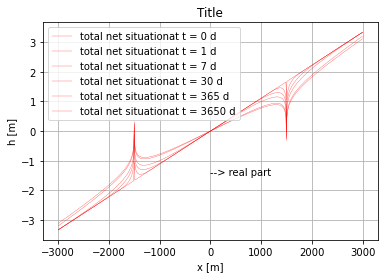

In [48]:
ax = newfig("Title", "x [m]", "h [m]")

times[0] = 1e-3
for t in times:
    u1 = r1 ** 2 * Sy / (4 * kD * t)
    u2 = r2 ** 2 * Sy / (4 * kD * t)

    # Compute drawdown
    s1 = -Q / (4 * np.pi * kD) * exp1(u1) # well
    s2 = +Q / (4 * np.pi * kD) * exp1(u2) # mirror well
    
    # Compute head
    h0 = h + s1 + s2 # Total head
        
    # Total net situation
    ax.plot(x, h0, 'r', lw=0.25, label='total net situationat t = {:.0f} d'.format(t))
ax.text(0, -1.5, '--> real part')
    
ax.legend()


### 2.	Make a picture of the head contours in top view after 1 month, 1 year and 10 years.

For this we need two 2S arrays, one for the x coordinates and one for the y coordinates. 

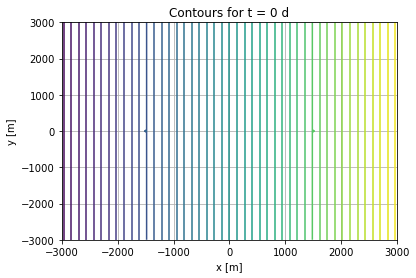

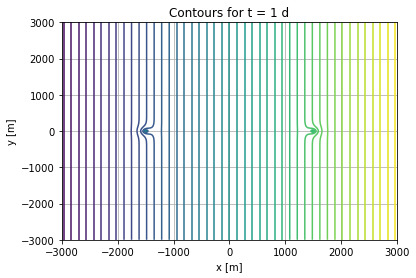

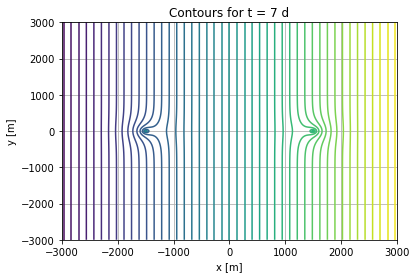

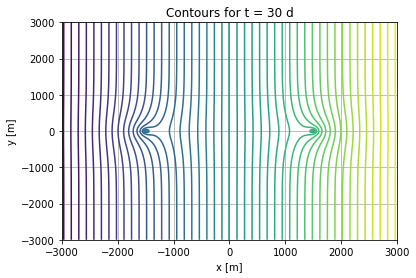

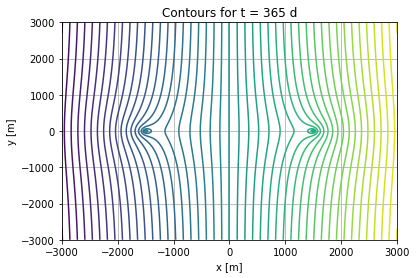

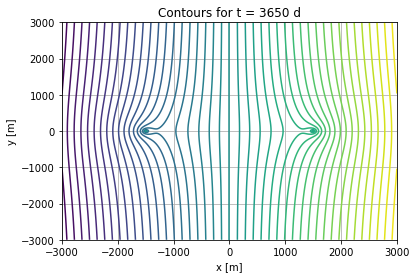

In [140]:
kD, Sy, Q, q, r0 = 900, 0.1, 1200, 1.0, 0.25

# Generate the 2 grids of coordinates: (using np.meshgrid)
x = np.linspace(-3000, 3000, 301)
y = np.linspace(-3000, 3000, 301)
X, Y = np.meshgrid(x, y) # Generate the two 2D arrays

# The distance from any point to the well and its mirror well
r1 = np.sqrt((X - L) ** 2 + (Y - 0) ** 2); r1[r1 < r0] = r0 
r2 = np.sqrt((X + L) ** 2 + (Y - 0) ** 2); r2[r2 < r0] = r0

# The iniital head due to the base flow (Which is now also a 2D array).
h0 = q / kD * X
# h = h * 0.  # If only the drawdown is required then set H=0

for t in times:    
    u1 = r1 ** 2 * Sy / (4 * kD * t) # Also 2D array
    u2 = r2 ** 2 * Sy / (4 * kD * t) # Same for mirror well

    # Compute drawdown, also 2D arrays
    s1 = -Q / (4 * np.pi * kD) * exp1(u1) # well
    s2 = +Q / (4 * np.pi * kD) * exp1(u2) # mirror well
    
    # Compute head, also 2D array
    h = h0 + s1 + s2 # Total head
    
    # Plot it, one contour plot for each of the times
    ax = newfig("Contours for t = {:.0f} d".format(t), 'x [m]', 'y [m]')
    ax.contour(X, Y, h, levels=50)
    
        
    

### 3. Plot the velocities

For this we take less coordinates or otherwise the graph will be a mess.

Note that the flow at distance r around a Theis well due to the well equals $Q_r = Q_0 \exp(-u)$

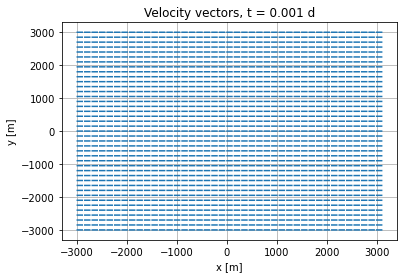

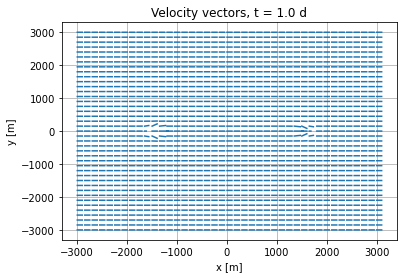

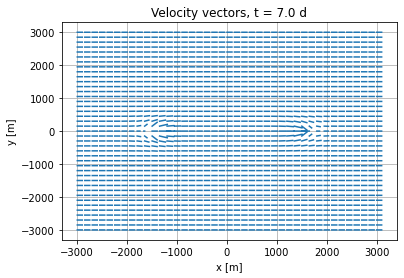

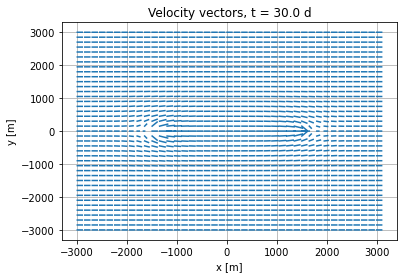

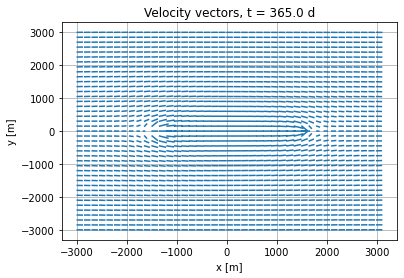

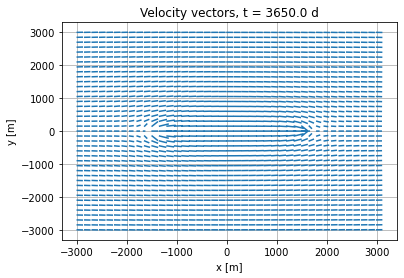

In [121]:
# Picture of the flow direction
kD, S, Q, L, r0, qx_, qy_ = 900, 0.1, 1200, 1500, 0.25, 1.0, 0.0

x = np.linspace(-3000, 3000, 41)
y = np.linspace(-3000, 3000, 41)
X, Y = np.meshgrid(x, y)

R1 = np.sqrt((X - L) ** 2 + (Y - 0) ** 2); R1[R1 < r0] = r0
R2 = np.sqrt((X + L) ** 2 + (Y - 0) ** 2); R2[R2 < r0] = r0

for t in times:
    
    U1 = R1 ** 2 * Sy / (4 * kD * t)
    U2 = R2 ** 2 * Sy / (4 * kD * t)

    qx1 = - Q * np.exp(-U1) * (X - L) / (2 * np.pi * R1 ** 2)
    qy1 = - Q * np.exp(-U1) * (Y - 0) / (2 * np.pi * R1 ** 2)

    qx2 = + Q * np.exp(-U2) * (X + L) / (2 * np.pi * R2 ** 2)
    qy2 = + Q * np.exp(-U2) * (Y - 0) / (2 * np.pi * R2 ** 2)

    qx = qx_ + qx1 + qx2
    qy = qy_ + qy1 + qy2

    f = 100.0
    X1 = X; X2 = X + f * qx; X3 = np.nan * X
    Y1 = Y; Y2 = Y + f * qy; Y3 = np.nan * Y
    xx = np.vstack((X1.ravel(), X2.ravel(), X3.ravel())).T.ravel()
    yy = np.vstack((Y1.ravel(), Y2.ravel(), Y3.ravel())).T.ravel()

    ax = newfig("Velocity vectors, t = {} d".format(t), "x [m]", "y [m]")
    ax.plot(xx, yy)



### 4 Inflow from the river. 

This is in fact the same as the question above. The main difference is that we only need the y-values at x=0. Therefore our coordinates will be those along the river, i.e. a long vector of zeros for the x and regular values for the y coordinate.

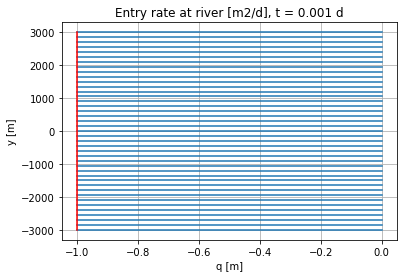

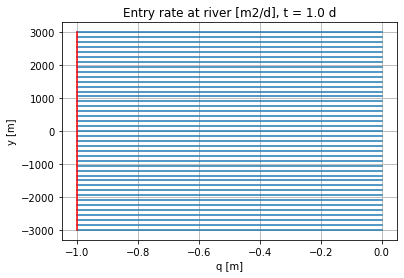

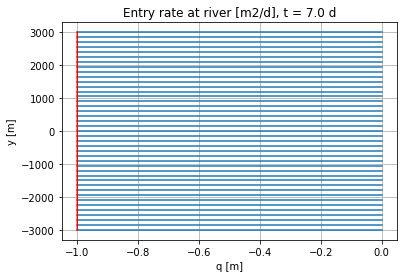

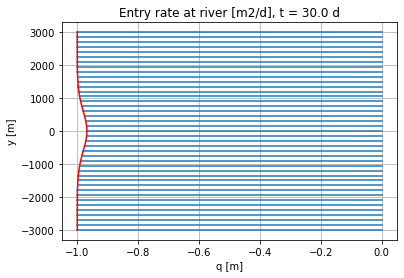

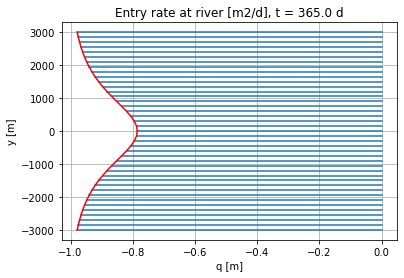

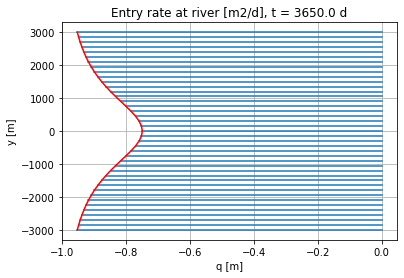

In [128]:
# Inflow at the river, i.e. X=0

# Picture of the flow direction
kD, S, Q, L, r0, qx_, qy_ = 900, 0.1, 1200, 1500, 0.25, -1.0, 0.0


y = np.linspace(-3000, 3000, 41)
x = np.zeros_like(y)

r1 = np.sqrt((x - L) ** 2 + (y - 0) ** 2); r1[r1 < r0] = r0
r2 = np.sqrt((x + L) ** 2 + (y - 0) ** 2); r2[r2 < r0] = r0

for t in times:
    
    u1 = r1 ** 2 * Sy / (4 * kD * t)
    u2 = r2 ** 2 * Sy / (4 * kD * t)

    qx1 = - Q * np.exp(-u1) * (x - L) / (2 * np.pi * r1 ** 2)
    qy1 = - Q * np.exp(-u1) * (y - 0) / (2 * np.pi * r1 ** 2)

    qx2 = + Q * np.exp(-u2) * (x + L) / (2 * np.pi * r2 ** 2)
    qy2 = + Q * np.exp(-u2) * (y - 0) / (2 * np.pi * r2 ** 2)

    qx = qx_ + qx1 + qx2
    qy = qy_ + qy1 + qy2

    f = 100.0
    x1 = x; x2 = x + f * qx; x3 = np.nan * x
    y1 = y; y2 = y + f * qy; y3 = np.nan * y
    xx = np.vstack((x1.ravel(), x2.ravel(), x3.ravel())).T.ravel()
    yy = np.vstack((y1.ravel(), y2.ravel(), y3.ravel())).T.ravel()
    
    q1 = np.zeros_like(x)
    q2 = qx
    q3 = np.zeros_like(x) * np.nan
    qq = np.vstack((q1.ravel(), q2.ravel(), q3.ravel())).T.ravel()

    ax = newfig("Entry rate at river [m2/d], t = {} d".format(t), "q [m]", "y [m]")

    ax.plot(qq, yy)
    ax.plot(qx, y, 'r')


The flow will be permanently outward, even in the steady state situation (t = 3650 d). This is due to the strong groundwater flow from the right to the left.

### 8 Find the point where the inflow is just zero. (This may be done analytically)

There is no point at which the river infiltrates. For this to happen either the base flow should be less, or the extraction should be must higher.

### 9 River stage varies by 2 m with T = 1 year = 365 days

In [144]:
omega = 2 * np.pi / 365
a = np.sqrt(omega * Sy / (2 * kD))

# The answer for the point at which the amplitude is reduced from 2 to 0.1 m follows from: $\frac{0.1}{2} = e^{-a x}$ 
L = np.log(2 / 0.1) / a
print("omega = {:.4g} rad/d".format(omega))
print("a     = {:.4g} /m".format(a))
print("L     = {:.4g} m".format(L))



omega = 0.01721 rad/d
a     = 0.0009779 /m
L     = 3063 m


print("The delay is {:.3g} d.".format(L * a / omega))

### 10 plot the envelopes around the actual situation. Just use steady-state drawdown for convenience

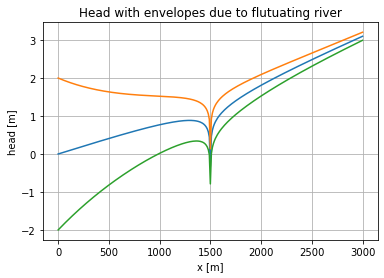

In [90]:

kD, Sy, q, Q, L, A = 900, 0.1, 1.0, 1200, 1500, 2.0

x = np.linspace(0, 3000, 301)

r1 = np.abs(x - L); r1[r1 < r0] = r0
r2 = np.abs(x + L); r2[r2 < r0] = r0

h = q / kD * x
s = Q / (2 * np.pi * kD) * np.log(r1 / r2)

env = A * np.exp(-a * x)

ax = newfig("Head with envelopes due to flutuating river", "x [m]", "head [m]")
ax.plot(x, h + s, label="head average.")
ax.plot(x, h + s + env, label="Top envelope")
ax.plot(x, h + s - env, label='Bottom envelope')

### 11 the delay of the wave at the point where the amplitude has declined by a factor of 20

$$ \omega t - ax = const \rightarrow  v_x = \frac{dx}{dt} = \omega /a \rightarrow t = L / v_x = L a / \omega$$


### 10 the sudden rise in head is 2.4 m namely P / Sy = 0.24 m / 0.1 = 2.4 m
 
### 11 The head is that of the uniform flow + the drawdown at t = 3650 (steady steate) + the dynamic head due after the sudden rise.

We may just as well immediately use the steady-state solution, which is just de sum of a steady-state well and its mirror.

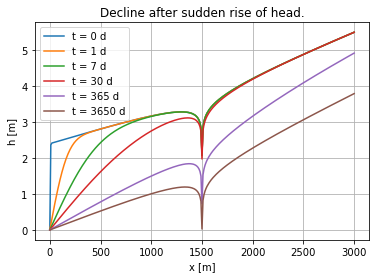

In [73]:
P, Q, kD, Sy, r0 = 0.24, 1200, 900, 0.1, 0.25

x = np.linspace(0, 3000, 301)

h0 = q / kD * x

r1 = np.abs(x - L); r1[np.abs(r1) < r0] = r0
r2 = np.abs(x + L); r2[np.abs(r2) < r0] = r0

# steady state well and mirror well
s = Q/ (2 * np.pi * kD) * np.log(r1 / r2)

# Sudden head changes due to shower of P=0.24 m
dh0 = P / Sy

ax = newfig("Decline after sudden rise of head.", "x [m]", "h [m]")

for t in times:
    # The declinening mound
    dh = dh0 * (1 - erfc( np.sqrt(x ** 2 * Sy / (4 * kD * t))))
              
    # Total head
    h = h0 + s + dh
    
    ax.plot(x, h, label='t = {:.0f} d'.format(t))
    
ax.legend()
              